Project 2 - Youtube Channels

In [15]:
#Importing for analyzing and visuazation of data
import pandas as pd 
%matplotlib inline 
import seaborn as sb
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import io
import datetime

In [16]:
#loading CSV file to dataframe
df = pd.read_csv('channels.csv')

In [17]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104752 entries, 0 to 104751
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   category_id    104752 non-null  int64  
 1   category_name  104752 non-null  object 
 2   channel_id     104752 non-null  object 
 3   country        70624 non-null   object 
 4   description    93423 non-null   object 
 5   followers      104752 non-null  int64  
 6   join_date      104751 non-null  object 
 7   location       0 non-null       float64
 8   picture_url    104752 non-null  object 
 9   profile_url    104752 non-null  object 
 10  title          104744 non-null  object 
 11  trailer_title  104671 non-null  object 
 12  trailer_url    104752 non-null  object 
 13  videos         104752 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 11.2+ MB


In [18]:
df.head()

,category_id,category_name,channel_id,country,description,followers,join_date,location,picture_url,profile_url,title,trailer_title,trailer_url,videos
0,24,Entertainment,UC-lHJZR3Gqxm24_Vd_AJ5Yw,United States,I make videos.,69896406,2010-04-29,NaN,https://yt3.ggpht.com/a-/AN66SAztY6oYWZnS1Cae9...,http://www.youtube.com/channel/UC-lHJZR3Gqxm24...,PewDiePie,bitch lasagna,https://www.youtube.com/watch?v=6Dh-RL__uN4,3649
1,10,Music,UCq-Fj5jknLsUf-MWSy4_brA,India,\,69471946,2006-03-13,NaN,https://yt3.ggpht.com/a-/AN66SAxPfKnfHAnAs0rOq...,http://www.youtube.com/channel/UCq-Fj5jknLsUf-...,T-Series,Guru Randhawa: GOLIMAAR Lyrical Video | Bhusha...,https://www.youtube.com/watch?v=nJ1f44JvlC8,12820
2,24,Entertainment,UCIwFjwMjI0y7PDBVEO9-bkQ,NaN,Help change the world. OUR album \'Purpose\' o...,41858494,2007-01-15,NaN,https://yt3.ggpht.com/a-/AN66SAzY-4LlEPxP9YOux...,http://www.youtube.com/channel/UCIwFjwMjI0y7PD...,Justin Bieber,DJ Khaled - No Brainer (Official Video) ft. Ju...,https://www.youtube.com/watch?v=kxloC1MKTpg,132
3,26,Howto & Style,UC295-Dw_tDNtZXFeAPAW6Aw,United States,"Fun diy-projects, crafts, experience the joy o...",40474509,2016-11-15,NaN,https://yt3.ggpht.com/a-/AN66SAzCuCdsGXFCbf4rL...,http://www.youtube.com/channel/UC295-Dw_tDNtZX...,5-Minute Crafts,5-Minute Crafts compilation: This video is a t...,https://www.youtube.com/watch?v=YAjzcignrLU,2350
4,17,Sports,UCJ5v_MCY6GNUBTO8-D3XoAg,NaN,WWE on YouTube is your number one spot to catc...,36301947,2007-05-11,NaN,https://yt3.ggpht.com/a-/AN66SAx_23YzwxBkenlfs...,http://www.youtube.com/channel/UCJ5v_MCY6GNUBT...,WWE,Braun Strowman and Brock Lesnar throw down bef...,https://www.youtube.com/watch?v=l6d1w8lJsm4,37928


In [19]:
#dropping unwanted columns from dataset
drop_cols = ['channel_id','picture_url','profile_url','trailer_url','location']
df = df.drop(drop_cols,axis = 1)

In [20]:
#dropping if there are any duplicate rows
df=df.drop_duplicates(keep='first')

In [21]:
#checking for missing values 
a = df.isnull().sum() 
a

category_id          0
category_name        0
country          34063
description      11305
followers            0
join_date            1
title                8
trailer_title       81
videos               0
dtype: int64

In [22]:
#filling the missing values in country column with random values from same column 
#filling missing values in other columns by unknown and join_date with 2004 as there are very few values in 2004
df.loc[df["country"].isna(), "country"] = df["country"].dropna().sample(df["country"].isna().sum(), replace=True).values 
df.fillna({'description':'unknown', 'title':'unknown', 'trailer_title':'unknown', 'join_date' : '2004'}, inplace=True)

In [23]:
#There are no missing values in the dataset
df.isnull().sum()

category_id      0
category_name    0
country          0
description      0
followers        0
join_date        0
title            0
trailer_title    0
videos           0
dtype: int64

In [24]:
#checking the count of values of column country after filling missing values
df['country'].value_counts()

United States         46244
Great-Britain          9685
India                  8012
Canada                 4964
Russian Federation     3109
                      ...  
Martinique                1
Tonga                     1
Cook Islands              1
Zambia                    1
Tokelau                   1
Name: country, Length: 203, dtype: int64

In [25]:
#creating seperate column for year from join date column
#changing datatype to datetime, copying value of year from join_date
df["join_date"] = pd.to_datetime(df["join_date"])

In [26]:
#df["join_date"].dt.year
df["year"] = df["join_date"].dt.year
df['year'] = df['year'].astype(int) #changing the datatype from float to int

In [27]:
df.head()

,category_id,category_name,country,description,followers,join_date,title,trailer_title,videos,year
0,24,Entertainment,United States,I make videos.,69896406,2010-04-29,PewDiePie,bitch lasagna,3649,2010
1,10,Music,India,\,69471946,2006-03-13,T-Series,Guru Randhawa: GOLIMAAR Lyrical Video | Bhusha...,12820,2006
2,24,Entertainment,Great-Britain,Help change the world. OUR album \'Purpose\' o...,41858494,2007-01-15,Justin Bieber,DJ Khaled - No Brainer (Official Video) ft. Ju...,132,2007
3,26,Howto & Style,United States,"Fun diy-projects, crafts, experience the joy o...",40474509,2016-11-15,5-Minute Crafts,5-Minute Crafts compilation: This video is a t...,2350,2016
4,17,Sports,United States,WWE on YouTube is your number one spot to catc...,36301947,2007-05-11,WWE,Braun Strowman and Brock Lesnar throw down bef...,37928,2007


United States has more number of youtube channels

<AxesSubplot:title={'center':'Country with maximum channels'}, xlabel='country', ylabel='count'>

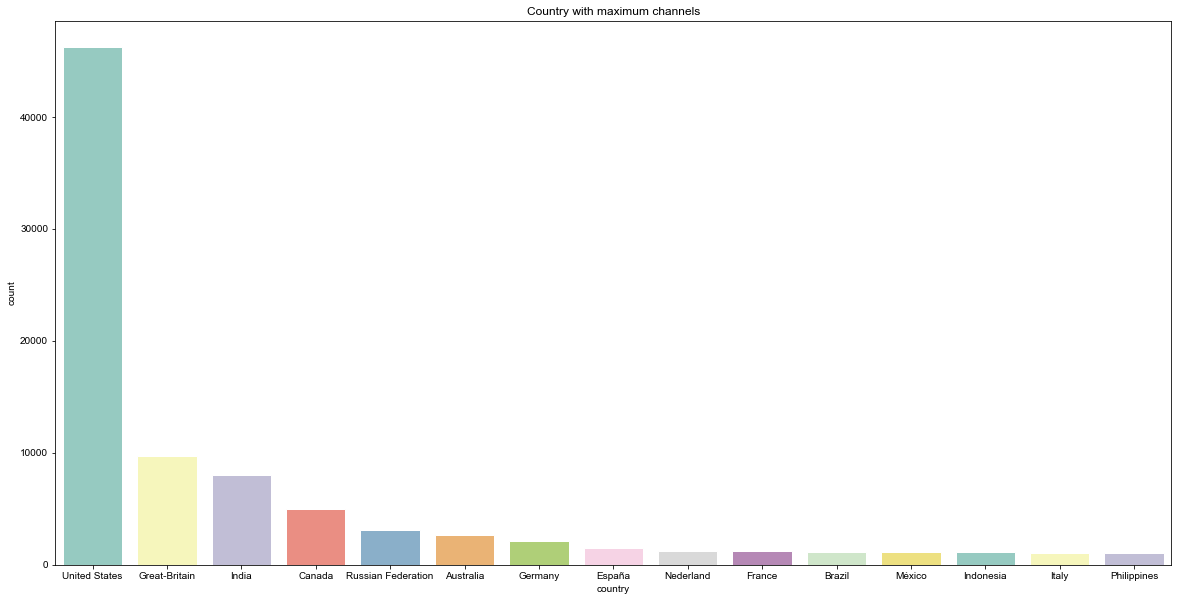

In [29]:
#countplot is used to create the hist or bar graphs with single column 
#x-axis has country names and y-axis has count of youtube channels for each country
plt.figure(1, figsize=(20, 10))
plt.title("Country with maximum channels")
sb.set_theme(style="darkgrid")
sb.countplot(x = "country", order=df['country'].value_counts().index[0:15],data=df,palette='Set3')

Is there an increase in number of youtube channels every year?

<AxesSubplot:xlabel='year', ylabel='count'>

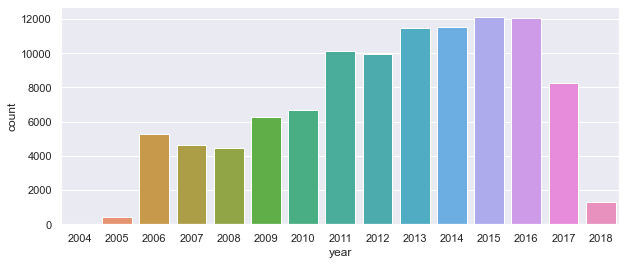

In [30]:
#x-axis is year from 2004 - 2018
#countplot is used to find if there is increase in count of youtube channels every year
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sb.countplot(x = 'year',ax=ax, data=df)

Youtube videos posted in music category in year 2015 are highest when compared to other years

In [32]:
#creating a dataframe for category_name = music
music=df[df['category_name']=='Music']
music

,category_id,category_name,country,description,followers,join_date,title,trailer_title,videos,year
1,10,Music,India,\,69471946,2006-03-13,T-Series,Guru Randhawa: GOLIMAAR Lyrical Video | Bhusha...,12820,2006
6,10,Music,Great-Britain,Ed Sheeran\'s official YouTube channel!,35343953,2006-08-08,Ed Sheeran,Drop4Drop x Ed Sheeran,122,2006
8,10,Music,United States,"Marshall Bruce Mathers III, better known by hi...",33959205,2007-02-09,EminemMusic,KILLSHOT [Official Audio],114,2007
9,10,Music,Italy,WITNESS! THE ALBUM THE TOUR IT\'S ALL HAPPENIN...,31797683,2008-06-01,Katy Perry,Katy Perry: Will You Be My Witness?,94,2008
10,10,Music,France,The Official Taylor Swift YouTube Channel,31556544,2006-09-20,Taylor Swift,Taylor Swift - Delicate,162,2006
...,...,...,...,...,...,...,...,...,...,...
104728,10,Music,Great-Britain,Official Youtube channel of Grido !,14757,2015-01-12,OfficialGrido,Grido ft. B.O.K - Cocaina (Official Music Video),4,2015
104732,10,Music,United States,"DUHHHHHHHH ITS YA BOY! I like fashion, girls a...",14756,2012-09-09,Coleweather1,Lil Uzi Vert - XO Tour Life (Official Dance Vi...,278,2012
104738,10,Music,United States,GALACTICA is out now! https://quin.lnk.to/gala...,14754,2015-12-08,QUIÑ,"QUIÑ - ""REMIND ME"" (Official ...",16,2015
104739,10,Music,United States,Known for his earth-shaking live performances ...,14753,2009-05-27,CROOKERS,Crookers - Beautiful,40,2009


In [33]:
#getting the total number of videos for each year in Music channel category using sum()
#Groupby method is used for getting count of videos per year
NumberOfVideosinMusicCategory = music.groupby([music.year])['videos'].sum()

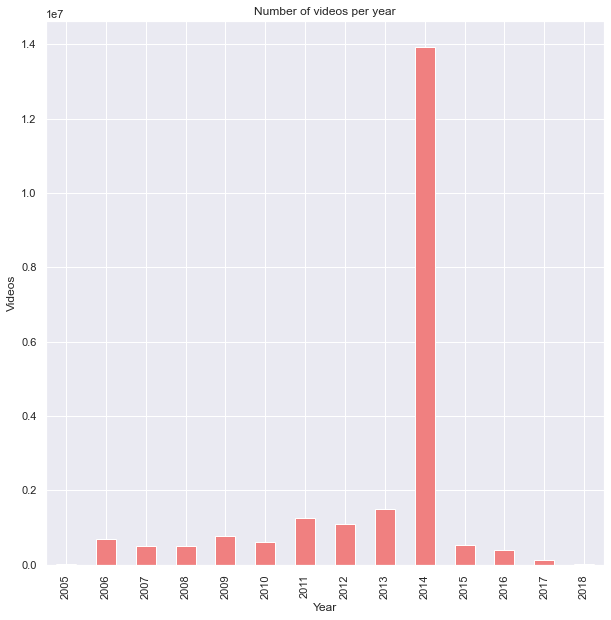

In [34]:
#plotting bar plot for videos in each year
#with years in x-axis and number of videos in x-axis
NumberOfVideosinMusicCategory.plot.bar(x = music.year, y = NumberOfVideosinMusicCategory, figsize = (10,10), color = 'lightcoral' )
plt.title("Number of videos per year")
plt.ylabel('Videos')
plt.xlabel('Year');

Is highest number of youtube subscribers are in Entertainment category

In [36]:
#Finding the total followers in each category by creating dataframe for each category from df 
education=df[df['category_name']=='Education']
entertainment=df[df['category_name']=='Entertainment']
gaming=df[df['category_name']=='Gaming']
Howto_Style=df[df['category_name']=='Howto & Style']
Sports=df[df['category_name']=='Sports']
People_Blogs=df[df['category_name']=='People & Blogs']
Travel_Events=df[df['category_name']=='Travel & Events']
Film_Animation=df[df['category_name']=='Film and Animation']
science_technology=df[df['category_name']=='Science & Technology']
comedy=df[df['category_name']=='Comedy']
Autos_Vehicles=df[df['category_name']=='Autos & Vehicles']
News_Politics=df[df['category_name']=='News & Politics']
Pets_animals=df[df['category_name']=='Pets_Animals']
Non_profit_Activism=df[df['category_name']=='Nonprofit & Activism']


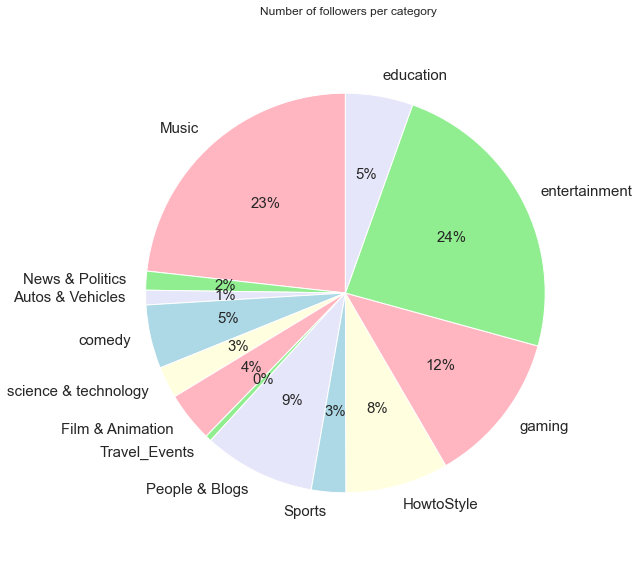

In [37]:
#using sum() function for followers column for getting total number of subscribers for all the categories
#plotting pie chart for finding category with hightest followers
labels = 'Music','News & Politics','Autos & Vehicles', 'comedy', 'science & technology', 'Film & Animation', 'Travel_Events', 'People & Blogs', 'Sports', 'HowtoStyle', 'gaming', 'entertainment', 'education'
sizes = [music.followers.sum(), News_Politics.followers.sum(),Autos_Vehicles.followers.sum(),comedy.followers.sum(),science_technology.followers.sum(),Film_Animation.followers.sum(),Travel_Events.followers.sum(),People_Blogs.followers.sum(),Sports.followers.sum(),Howto_Style.followers.sum(),gaming.followers.sum(),entertainment.followers.sum(),education.followers.sum()]
colors = ["lightpink", "lightgreen", "lavender", "lightblue", "lightyellow"]
plt.figure(figsize=(8,10))
plt.pie(sizes, autopct='%1.0f%%', labels = labels,colors=colors, shadow=False, startangle=90, textprops={'fontsize': 15})
plt.axis('equal') 
plt.title('Number of followers per category')
plt.show()

In [38]:
#Citation: https://seaborn.pydata.org/generated/seaborn.countplot.html
#https://stackoverflow.com/questions/48511484/data-type-conversion-error-valueerror-cannot-convert-non-finite-values-na-or  
#https://stackoverflow.com/questions/66465894/fill-missing-data-with-random-values-from-categorical-column-python